<a href="https://colab.research.google.com/github/ahmad1jalal/ML_Projects/blob/main/Heart_Disease_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
# Importing data...
data = pd.read_csv("/content/drive/MyDrive/CSV_Data/heart-disease.csv")

In [31]:
# Checking the data by getting it's five rows...
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [32]:
# Getting the data shape...
data.shape

(303, 14)

In [33]:
# So there are 14 features and total 303 entries it's a quite small data for ml problems but we can move further with this data....
# Now checking that proportion of ill and healthy person to get the idea...
data["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

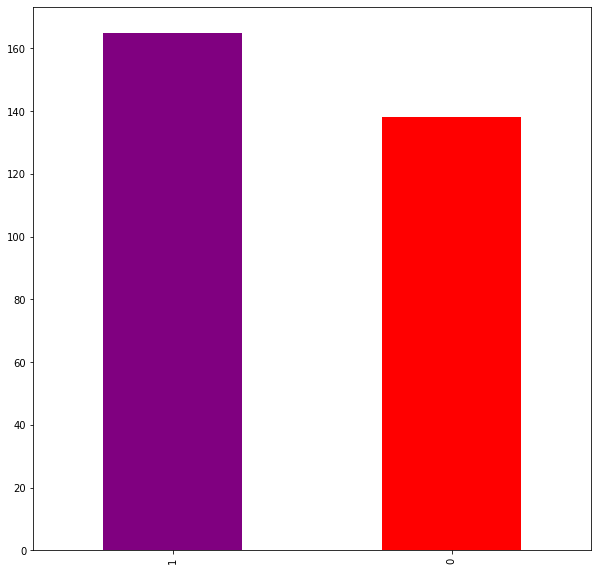

In [34]:
#Out of 303 we've 138 healthy and 165 ill person means 54% ill and 45% healthy respectively....
# It become more clear when we will visualize it....
data["target"].value_counts().plot(kind="bar",color=["purple","red"],figsize=(10,10))

In [35]:
# Now let's check the info about the data such data type and missing entries...
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [36]:
# Statistical terms such as mean, min,max and std are quite important in ml we can get the mean, min ,max and std of data...
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [37]:
# As this is general data so it's important to check that the proportion of male and female in the data...
print(data.sex.value_counts())
pd.crosstab(data.target,data.sex)

1    207
0     96
Name: sex, dtype: int64


sex,0,1
target,,
0,24,114
1,72,93


In [38]:
"""Since there are about 100 women and 72 of them have a postive value of heart disease being present, we might infer, based on this one variable if the participant is a woman, there's a 75% chance she has heart disease.
As for males, there's about 200 total with around half indicating a presence of heart disease. So we might predict, if the participant is male, 50% of the time he will have heart disease.
Averaging these two values, we can assume, based on no other parameters, if there's a person, there's a 62.5% chance they have heart disease."""

"Since there are about 100 women and 72 of them have a postive value of heart disease being present, we might infer, based on this one variable if the participant is a woman, there's a 75% chance she has heart disease.\nAs for males, there's about 200 total with around half indicating a presence of heart disease. So we might predict, if the participant is male, 50% of the time he will have heart disease.\nAveraging these two values, we can assume, based on no other parameters, if there's a person, there's a 62.5% chance they have heart disease."

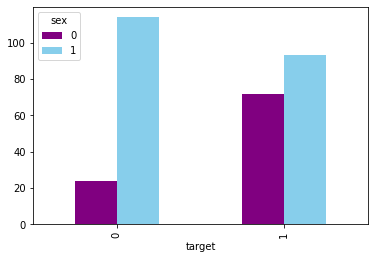

In [39]:
# Now visualize it 
pd.crosstab(data.target,data.sex).plot(kind="bar",color=["purple","skyblue"])

In [40]:
# Correlation of the data...
corr = data.corr()
corr

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


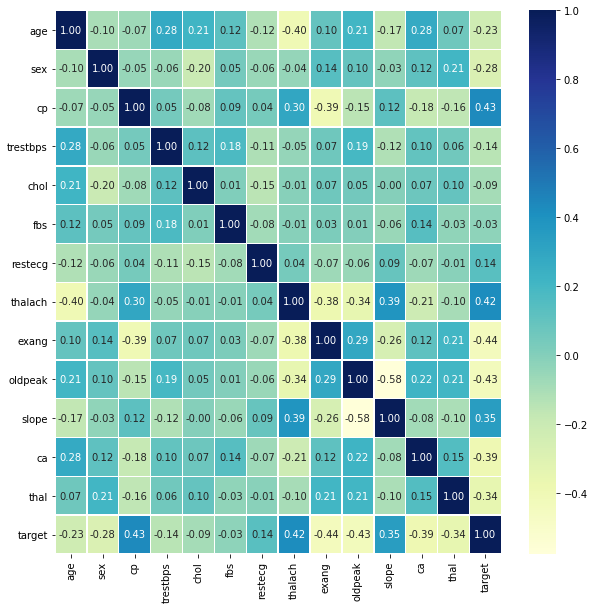

In [43]:
# let'a make it better for getting the insight...
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True,linewidths=0.5, 
            fmt= ".2f", 
            cmap="YlGnBu")

In [44]:
# As now we have get the enough insight about the data so it's time for data modeling...
# Separate Independent and Dependent data....
X = data.drop("target",axis=1)
y = data["target"]
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [45]:
# As there is no categorical feature so there is no need of OneHotEncoding but we have to split it in training and testing set...

In [57]:
np.random.seed(42)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)
# Checking the training and testing data shape....
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(227, 13) (227,) (76, 13) (76,)


In [62]:
# Normalize the data....
from sklearn.preprocessing import StandardScaler
Sc_X = StandardScaler()
X_train = Sc_X.fit_transform(X_train)
X_test = Sc_X.transform(X_test)

In [63]:
# Now import the models....
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression


In [64]:
models = {"LogistRegression":LogisticRegression(),
          "KNeighborsClassifier":KNeighborsClassifier(),
          "RandomForestClassifier":RandomForestClassifier(),
          "DecisionTreeClassifier":DecisionTreeClassifier()}

In [65]:
def fitting_model(models,X_train,y_train,X_test,y_test):
  np.random.seed(42)
  model_scores ={}
  for name,model in models.items():
    model.fit(X_train,y_train)
    model_scores[name] = model.score(X_test,y_test)

  return model_scores

In [66]:
model_score = fitting_model(models,X_train,y_train,X_test,y_test)
model_score

{'DecisionTreeClassifier': 0.7894736842105263,
 'KNeighborsClassifier': 0.881578947368421,
 'LogistRegression': 0.881578947368421,
 'RandomForestClassifier': 0.8157894736842105}

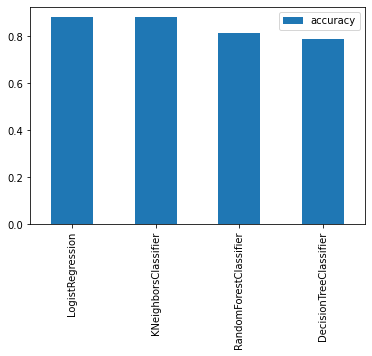

In [68]:
# Comparing the score of each model
model_comp = pd.DataFrame(model_score,index=["accuracy"])
model_comp.T.plot(kind="bar")

In [69]:
# So we can clearly see that LogisticRegression has outperforms the other classifier 
# So now we'll pick it and hypertune it to get more better results....

In [70]:
# importing the library for the hypertunning
from sklearn.model_selection import RandomizedSearchCV

In [80]:
np.random.seed(42)
log_reg_grid = {"C": np.logspace(-4, 4, 20),"solver": ["liblinear"]}
log_reg_ser = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,cv=5,n_iter=20)

# Fitting RandomSearchModel on data.....

log_reg_ser.fit(X_train,y_train);

In [81]:
# Getting the best parameter from the model...
log_reg_ser.best_params_

{'C': 0.0001, 'solver': 'liblinear'}

In [82]:
log_reg_ser.score(X_test,y_test)

0.881578947368421

Now tune the model with GridSearchCV....
Why GridSearchCV????
Difference between GridSearchCV and RandomzedSearchCV
Grid Search can be thought of as an exhaustive search for selecting a model. In Grid Search, the data scientist sets up a grid of hyperparameter values and for each combination, trains a model and scores on the testing data. In this approach, every combination of hyperparameter values is tried which can be very inefficient. 
By contrast, Random Search sets up a grid of hyperparameter values and selects random combinations to train the model and score. This allows you to explicitly control the number of parameter combinations that are attempted. The number of search iterations is set based on time or resources. 

In [84]:
# Now tune a model using GridSearchCV....
from sklearn.model_selection import GridSearchCV
log_reg_g_ser = GridSearchCV(LogisticRegression(),param_grid=log_reg_grid,cv=5,verbose=True)
log_reg_g_ser.fit(X_train,y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished


In [86]:
# Getting the best parameters of the model....
log_reg_g_ser.best_params_

{'C': 0.0001, 'solver': 'liblinear'}

In [87]:
log_reg_g_ser.score(X_test,y_test)

0.881578947368421

In [103]:
clf = LogisticRegression(C= 0.0001, solver= 'liblinear')
clf.fit(X_train,y_train)

LogisticRegression(C=0.0001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [104]:
# Now checking the accurcy of model using different accuracy method but first get prediction....
y_pred = clf.predict(X_test)

In [93]:
y_pred

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1])

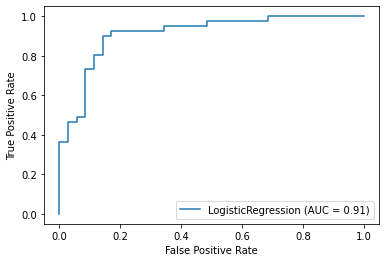

In [105]:
# importing Roc Curve
from sklearn.metrics import plot_roc_curve

# Plotting the Roc Curve
plot_roc_curve(clf,X_test,y_test)

In [95]:
# Our model does far better than guessing which would be a line going from the bottom left corner to the top right corner, AUC = 0.5. But a perfect model would achieve an AUC score of 1.0

In [106]:
# Importing confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[30,  5],
       [ 4, 37]])

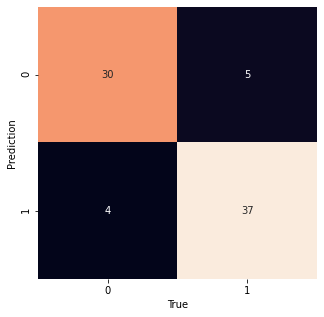

In [107]:
# Let's visualize the confusion matrix...
def plot_conf(cm):
  fig,ax = plt.subplots(figsize=(5,5))
  ax = sns.heatmap(cm,annot=True,cbar=False)
  plt.xlabel("True")
  plt.ylabel("Prediction")

plot_conf(cm)

In [108]:
# We can make the classification report of model performance....
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.86      0.87        35
           1       0.88      0.90      0.89        41

    accuracy                           0.88        76
   macro avg       0.88      0.88      0.88        76
weighted avg       0.88      0.88      0.88        76



In [109]:
# Now another method to get the accuracy of the model....
from sklearn.model_selection import cross_val_score
cross_score = cross_val_score(clf,X,y,cv=5,scoring="accuracy")

cross_score

array([0.63934426, 0.6557377 , 0.7704918 , 0.71666667, 0.68333333])

In [110]:
# Taking the mean of the accuracy of the model...
cross_score.mean()

0.6931147540983608

In [111]:
# Cross-validated precision score
cv_precision = np.mean(cross_val_score(clf,
                                       X,
                                       y,
                                       cv=5, # 5-fold cross-validation
                                       scoring="precision")) # precision as scoring
cv_precision

0.6900853815487963

In [112]:
# Cross-validated F1 score
cv_f1 = np.mean(cross_val_score(clf,
                                X,
                                y,
                                cv=5, # 5-fold cross-validation
                                scoring="f1")) # f1 as scoring
cv_f1

0.740192714453584

In [115]:
# Cross-validated recall score
cv_recall = np.mean(cross_val_score(clf,
                                    X,
                                    y,
                                    cv=5, # 5-fold cross-validation
                                    scoring="recall")) # recall as scoring
cv_recall

0.8

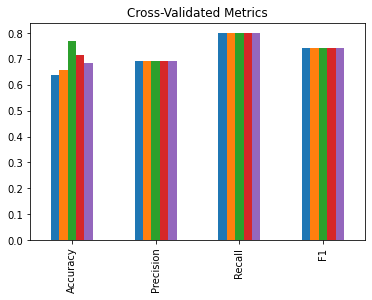

In [121]:
# Visualizing cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cross_score,
                            "Precision": cv_precision,
                            "Recall": cv_recall,
                            "F1": cv_f1},)
cv_metrics.T.plot.bar(title="Cross-Validated Metrics", legend=False);

In [122]:
# Match features to columns
features_dict = dict(zip(data.columns, list(clf.coef_[0])))
features_dict

{'age': -0.0023828258370165102,
 'ca': -0.004267921365711621,
 'chol': -0.0007276566127832342,
 'cp': 0.004804958920379451,
 'exang': -0.004938051387128787,
 'fbs': 4.876714657057177e-05,
 'oldpeak': -0.00487298319126589,
 'restecg': 0.0011505282337849337,
 'sex': -0.003328818108411958,
 'slope': 0.0038240804481866936,
 'thal': -0.0038507447367784487,
 'thalach': 0.004256028547980428,
 'trestbps': -0.0009440092093794985}

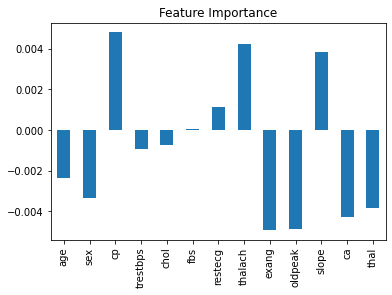

In [123]:
# Visualize feature importance
features_df = pd.DataFrame(features_dict, index=[0])
features_df.T.plot.bar(title="Feature Importance", legend=False);

In [125]:
# Contrast slope (positive coefficient) with target
pd.crosstab(data["slope"], data["target"])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107
